In this exercise spreadsheet, we show several examples of change of random variables. 
The question we ask is: if the random variable X follows a distribution f, what is the distribution of a function of the random variable Y = g(X)?

Example 1: X follows a normal distribution (=Gaussian with zero mean and variance one).
           what is the distribution of X**2? 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Nsim = 5000
X = np.random.randn(Nsim)
Y = X**2 

minY = np.min(Y)
maxY = np.max(Y)

Now plot the distribution of Y. These values span between min(Y) and max(Y). Let us consider the interval [min(Y), max(Y)], and denote its length L. We split this interval in 10 intervals of equal lenghts (also called bins), and count how many times Y took a value between k * L/10 and (k+1) * L/10 for k=0..9. The resulting plot is called a histogram.

Text(0.5, 0.98, 'Histogram of the values of X**2')

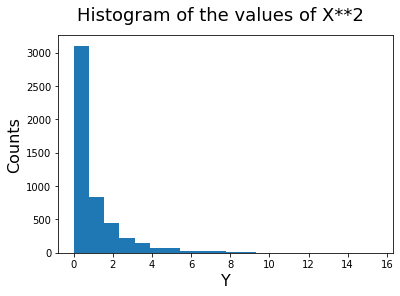

In [6]:
plt.figure()
Nbins = 20  #Number of bins
range_absc = (minY, maxY)

plt.hist(Y , range=range_absc, bins=Nbins)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.suptitle('Histogram of the values of X**2', fontsize=18)

Now we compare the empirical distribution of Y to the theoretical one. We have made the change of variable $Y = g(X)$ with $g(x) = x^2$. Denoting by $f_X$ the density of X, recall that the distribution followed by g(X) is
$$ f_Y(y) = \sum_{x_k, g(x_k) = y}  \frac{1}{\left|g'(x_k) \right|} f_X(x_k)  $$
which means that the sum is on all the $x_k$ such that $g(x_k) = y$.

X is a normal variable, its distribution is therefore
$$ f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

The equation $x^2 = y$ has two solutions, $x_1 = -\sqrt{y}$ and $x_2 = \sqrt{y}$.
We have $g'(x) = 2 x$ so $$\left|g'(x_1) \right| = \left|g'(x_2) \right| = 2\sqrt{y}$$ and $$ f_X(x_1) = f_X(x_2) = \frac{1}{\sqrt{2\pi}}e^{-\frac{y}{2}}$$
The probability density function of $Y = X^2$ computed from the change of variable formula is then 
$$ f_Y(y) = \sum_{k=1,2}  \frac{1}{\left|g'(x_k) \right|} f_X(x_k) = \frac{1}{2\sqrt{y}} \frac{1}{\sqrt{2\pi}}e^{-\frac{y}{2}} + \frac{1}{2\sqrt{y}} \frac{1}{\sqrt{2\pi}}e^{-\frac{y}{2}}$$
So
$$f_Y(y) = \frac{1}{\sqrt{2\pi y}} e^{-\frac{y}{2}}$$

We overplot the empirical and theoretical densities

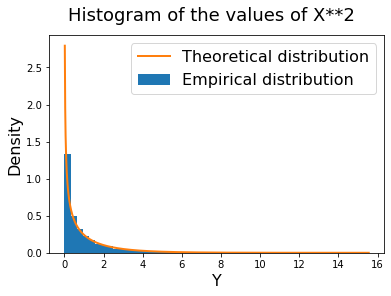

In [7]:
a = np.arange(minY+0.02, maxY, 0.01)
sqrta = np.sqrt(a)
ordinate = 1/np.sqrt(2*np.pi*a) * np.exp(-a/2)

plt.figure()
Nbins = 50
range_absc = (minY, maxY)
plt.hist(Y, density= True , range=range_absc, bins=Nbins, label='Empirical distribution')
plt.plot(a, ordinate, label='Theoretical distribution', linewidth=2)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle('Histogram of the values of X**2', fontsize=18)
plt.legend(fontsize=16)

Question 1: 
How sensitive to the range and number of bins is the visual aspect of the empirical distribution? 
Generate 20, 50, 100 data points (variable Nsim). Plot the empirical distribution for 5,10 bins (variable Nbin).


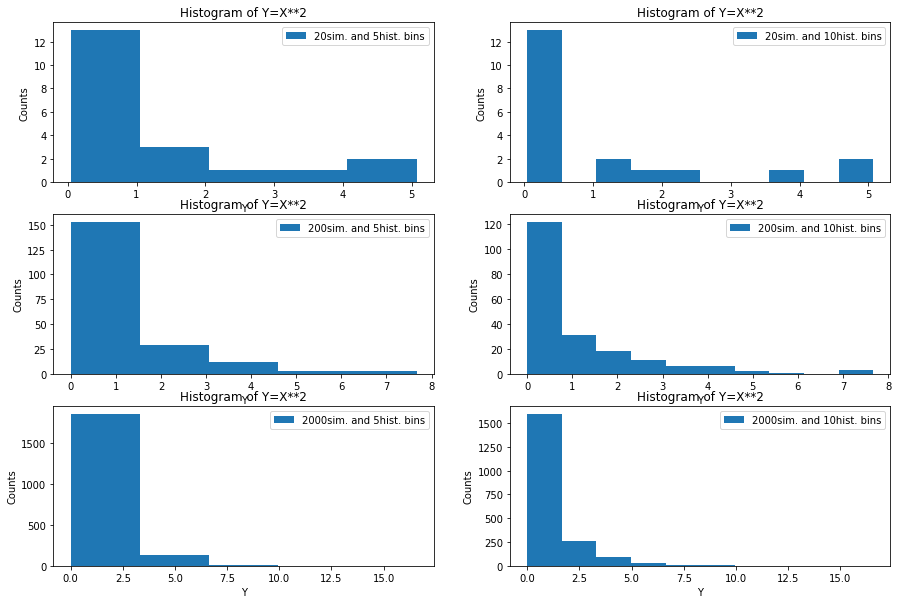

In [25]:
Nsim = np.array([20,200,2000])
Nbins = np.array([5,10])
plt.figure(figsize = (15,10))
plt.title('Histogram of Y=X**2')
for i in range(3):
    X = np.random.randn(Nsim[i])
    Y = X**2 
    minY = np.min(Y)
    maxY = np.max(Y)
    for j  in range(2):
        ax = plt.subplot2grid((3,2),(i,j),colspan=1,rowspan=1)
        range_absc = (minY, maxY)

        plt.title('Histogram of Y=X**2')
        ax.hist(Y,range=range_absc, bins=Nbins[j],label = (str(Nsim[i])+'sim. and '+str(Nbins[j])+'hist. bins'))
        ax.set_xlabel('Y')
        ax.set_ylabel('Counts')
        ax.legend(loc=1)
        

Question 2
Following the method presented above, plot the empirical distribution and the theoretical distribution of a sum of two independent Gaussian variables.

Text(0.5, 0.98, 'Histogram of Y=X1+X2')

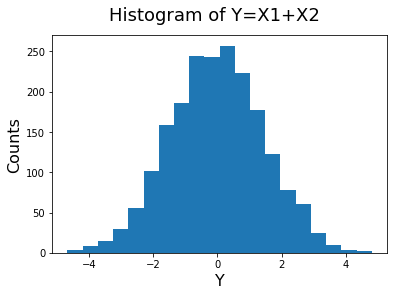

In [79]:
Nsim=2000
X1 = np.random.randn(Nsim)
X2 = np.random.randn(Nsim)
Y1 = X1 + X2 
minY = np.min(Y1)
maxY = np.max(Y1)
plt.figure()
Nbins = 20  #Number of bins
range_absc = (min(Y1), max(Y1))

plt.hist(Y1 , range=range_absc, bins=Nbins)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.suptitle('Histogram of Y=X1+X2', fontsize=18)

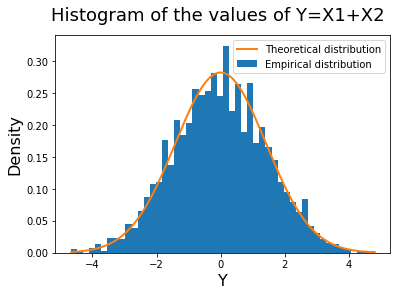

In [80]:
a = np.arange(minY+0.02, maxY, 0.01)
ordinate1 = np.exp(-a**2/4)/2/np.sqrt(np.pi)

plt.figure()
Nbins = 50
range_absc = (minY, maxY)
plt.hist(Y1, density= True , range=range_absc, bins=Nbins, label='Empirical distribution')
plt.plot(a, ordinate1, label='Theoretical distribution', linewidth=2)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle('Histogram of the values of Y=X1+X2', fontsize=18)
plt.legend(loc=0)

Question 3
Plot the empirical distribution and the theoretical distribution of the mean of n independent Gaussian variables of mean mu and standard deviation sigma. 


(2000,)

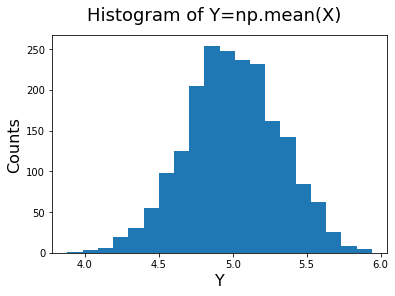

In [90]:
#Choose the values of 
n = 10
sigma = 1
mu = 5

#Generate Nsim realizations of n random Gaussian variables of mean mu and standard deviation sigma
M = np.random.randn(Nsim, n)*sigma + mu
#For each realization, take the mean of n variables
Y2 = np.sum(M, axis=1) / n
var= np.var(M,axis=0)
minY = np.min(Y2)
maxY = np.max(Y2)
plt.figure()
Nbins = 20  #Number of bins
range_absc = (min(Y2), max(Y2))

plt.hist(Y2 , range=range_absc, bins=Nbins)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.suptitle('Histogram of Y=np.mean(X)', fontsize=18)
Y2.shape

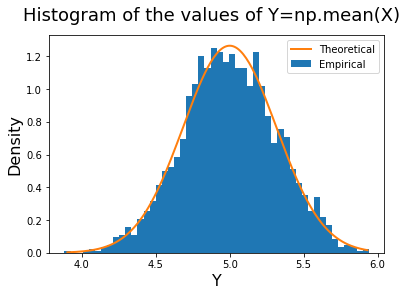

In [92]:
a = np.arange(minY+0.02, maxY, 0.01)
ordinate2 = np.exp(-(a-np.mean(Y2))**2/2/(np.sum(var)/n**2))/np.sqrt(2*np.pi)/np.sqrt(np.sum(var)/n**2)

plt.figure()
Nbins = 50
range_absc = (minY, maxY)
plt.hist(Y2, density= True , range=range_absc, bins=Nbins, label='Empirical')
plt.plot(a, ordinate2, label='Theoretical', linewidth=2)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle('Histogram of the values of Y=np.mean(X)', fontsize=18)
plt.legend(loc=0)

Question 4
Let us suppose you have samples from a uniform variable U. What is the f such that f(U) is Gaussian? 

Plot the distribution of the samples obtained. 

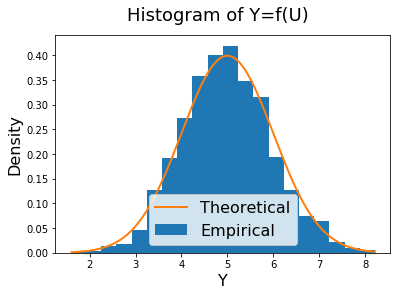

In [70]:
from scipy.special import erfinv
U = np.random.rand(Nsim)
sigma = 1.
mu=5.
Y3=np.zeros(Nsim)
for i in range(Nsim):
    Y3[i] = erfinv(2.*U[i]-1)*sigma*np.sqrt(2)+mu
minY = np.min(Y3)
maxY = np.max(Y3)
plt.figure()
Nbins = 20  #Number of bins
range_absc = (minY,maxY)

plt.hist(Y3 , range=range_absc,density= True, bins=Nbins, label='Empirical')
plt.xlabel('Y', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.suptitle('Histogram of Y=f(U)', fontsize=18)

a = np.arange(minY+0.02, maxY, 0.01)
ordinate3 = np.exp(-(a-mu)**2/2/sigma**2)/np.sqrt(2*np.pi)
plt.plot(a, ordinate3, label='Theoretical', linewidth=2)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(fontsize=16)